In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\DS-Assignment Dataset and instructions\DS-Assignment Dataset and instructions\P3- Churn-Modelling Data.xlsx")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned'],
      dtype='object')

In [6]:
df.drop(columns=['RowNumber'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  churned          10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


1.  Customer Demographics: 
   - What is the distribution of customers across different age groups?
   - Analyze the gender distribution of customers.

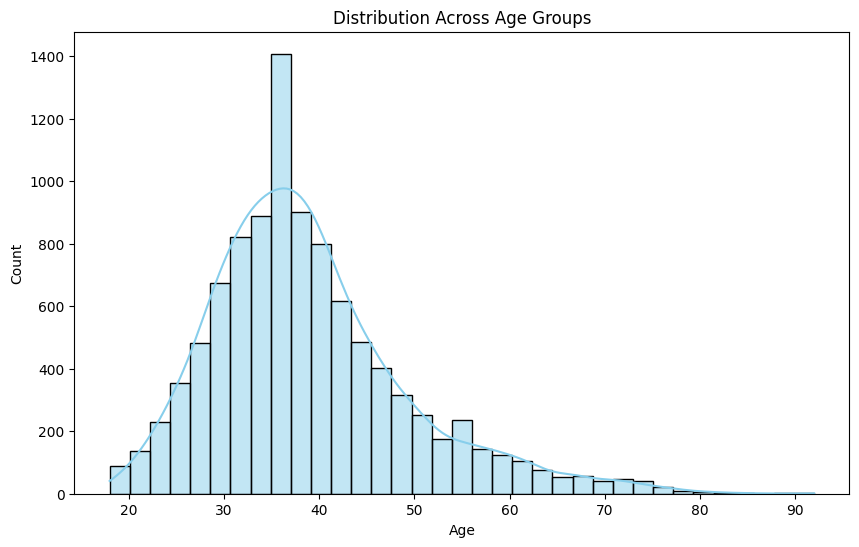

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=35, kde=True, color='skyblue')
plt.title('Distribution Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


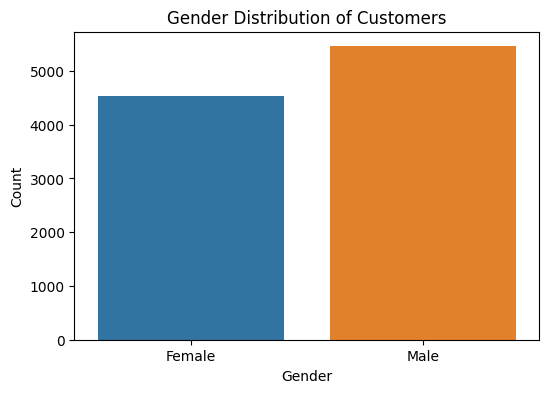

In [12]:
# for gender distribution 
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [13]:
genders = df['Gender'].value_counts()
genders

Male      5457
Female    4543
Name: Gender, dtype: int64

2.  Churn Analysis: 
   - What percentage of customers have churned?
   - What are the main reasons for customer churn?
   - Identify any patterns or trends among customers who have churned.


In [14]:
# percentage of customers who have churned
percentage_churn = (df['churned'].sum() / len(df)) * 100
print(f"Percentage of customers who have churned: {percentage_churn:.2f}%")

Percentage of customers who have churned: 20.37%


In [15]:
churned_data = df[df['churned'] == 1]

In [16]:
churned_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [17]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [18]:
print(max(df['CreditScore']))
print(min(df['CreditScore']))

850
350


In [19]:
churned_data['Balance'].value_counts()

0.00         500
129934.64      1
104339.11      1
142946.18      1
109908.06      1
            ... 
125647.36      1
138881.04      1
113715.36      1
81290.02       1
75075.31       1
Name: Balance, Length: 1538, dtype: int64

In [21]:
churned_data['Gender'].value_counts()

Female    1139
Male       898
Name: Gender, dtype: int64

In [22]:
churned_data['Geography'].value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

In [23]:
churned_data['HasCrCard'].value_counts()

1    1424
0     613
Name: HasCrCard, dtype: int64

In [25]:
churned_data['IsActiveMember'].value_counts()

0    1302
1     735
Name: IsActiveMember, dtype: int64

In [26]:
churned_data['NumOfProducts'].value_counts()

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64

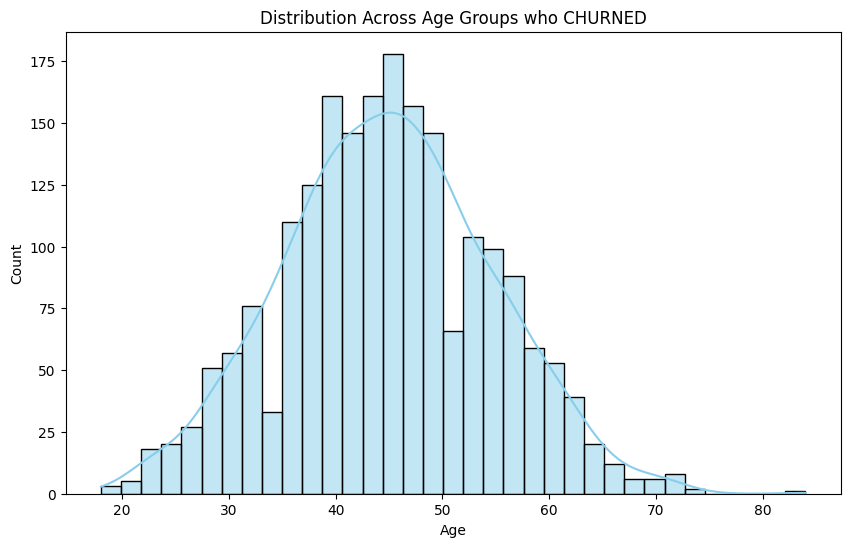

In [28]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(churned_data['Age'], bins=35, kde=True, color='skyblue')
plt.title('Distribution Across Age Groups who CHURNED')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


1) About 500 people had 0.00 balance in there account.
2) Number of females who churned is more than number of males who churned out.
3) About 1400 people who churned have a credit card, on the contrary about 600 don't.
4) About 1300 inactive members.
5) About 1200 out of 2000 members had only one product.
6) Mostly people of the age group 40-50 churned.

Rest specific reasons for churning would require additional data.

3.  Product Usage: 
   - What are the most commonly used products or services?
   - Analyze the usage patterns of different customer segments.


In [29]:
# count of customers for each number of products / services 
mostly_used = df['NumOfProducts'].value_counts().sort_index()

print("Most commonly used products/services:")
print(mostly_used)

Most commonly used products/services:
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


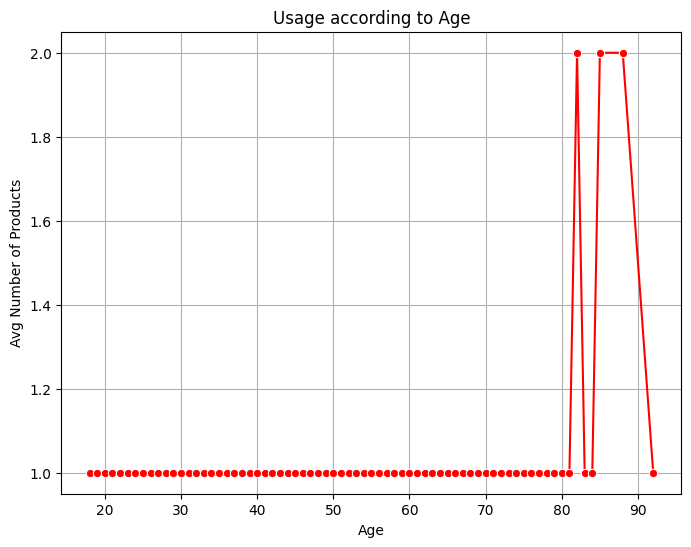

In [30]:
usage_pattern = df.groupby('Age')['NumOfProducts'].mean().astype(int)
plt.figure(figsize=(8,6))
sns.lineplot(x=usage_pattern.index, y=usage_pattern.values, marker='o', color='red')
plt.title('Usage according to Age')
plt.xlabel('Age')
plt.ylabel('Avg Number of Products')
plt.grid(True)
plt.show()

4.  Financial Analysis: 
   - What is the average account balance of customers?
   - Compare the financial characteristics of churned vs. non-churned customers.



In [65]:
# Average Balance 
avg_balance = df['Balance'].mean()
print(f"Average account balance of customers: {avg_balance:.2f}")

Average account balance of customers: 76485.89


In [31]:
print(f"Number of customers with zero account balance : {len(df[df['Balance'] == 0])}")

Number of customers with zero account balance : 3617


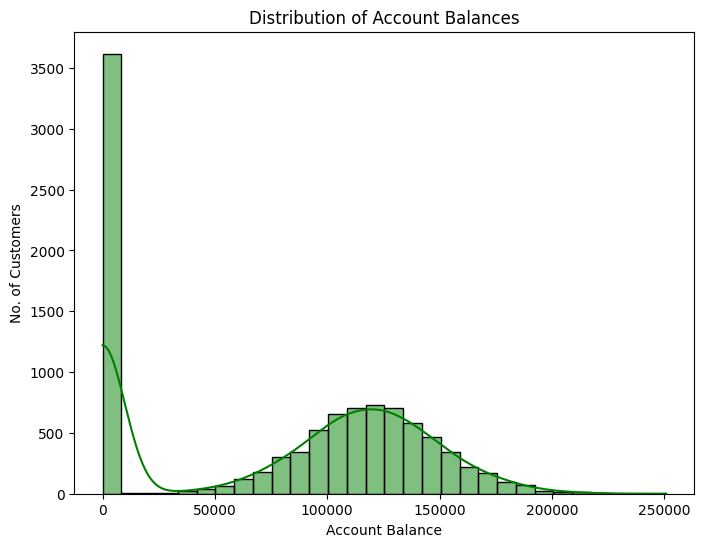

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Balance'], bins=30, kde=True, color='green')
plt.title('Distribution of Account Balances')
plt.xlabel('Account Balance')
plt.ylabel('No. of Customers')
plt.show()

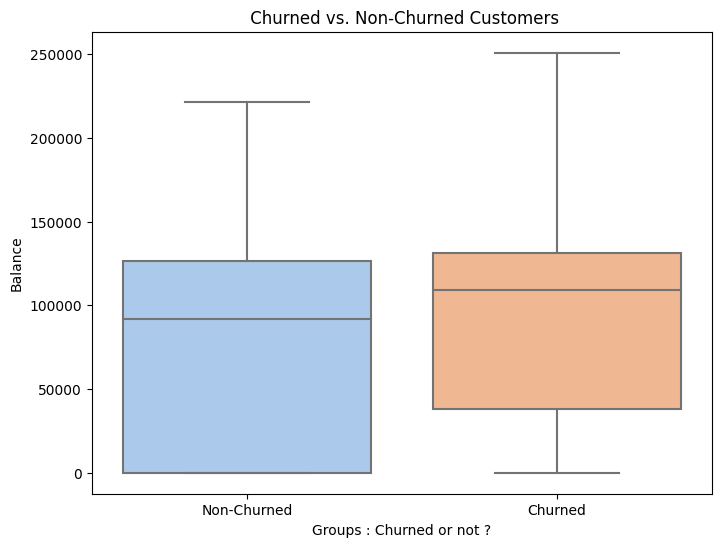

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churned', y='Balance', data=df, palette='pastel')
plt.title(' Churned vs. Non-Churned Customers')
plt.xlabel('Groups : Churned or not ?')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

In [34]:
non_churned_data = df[df['churned'] == 0]

In [35]:
non_churned_data.shape

(7963, 13)

In [36]:
churned_data.shape

(2037, 13)

In [37]:
print(non_churned_data['CreditScore'].describe())

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64


In [38]:
print(churned_data['CreditScore'].describe())

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: CreditScore, dtype: float64


In [39]:
print(non_churned_data['EstimatedSalary'].describe())

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [40]:
print(churned_data['EstimatedSalary'].describe())

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: EstimatedSalary, dtype: float64


In [41]:
print(non_churned_data["Balance"].describe())

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64


In [42]:
print(churned_data["Balance"].describe())

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64


In [43]:
non_churned_data['HasCrCard'].value_counts()

1    5631
0    2332
Name: HasCrCard, dtype: int64

In [44]:
churned_data['HasCrCard'].value_counts()

1    1424
0     613
Name: HasCrCard, dtype: int64

5.  Predictive Modeling: 
   - Which factors are the most significant predictors of customer churn?
   - Develop a predictive model to identify at-risk customers.


In [45]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churned'],
      dtype='object')

In [46]:
df = df.drop(columns=['CustomerId', 'Surname'])

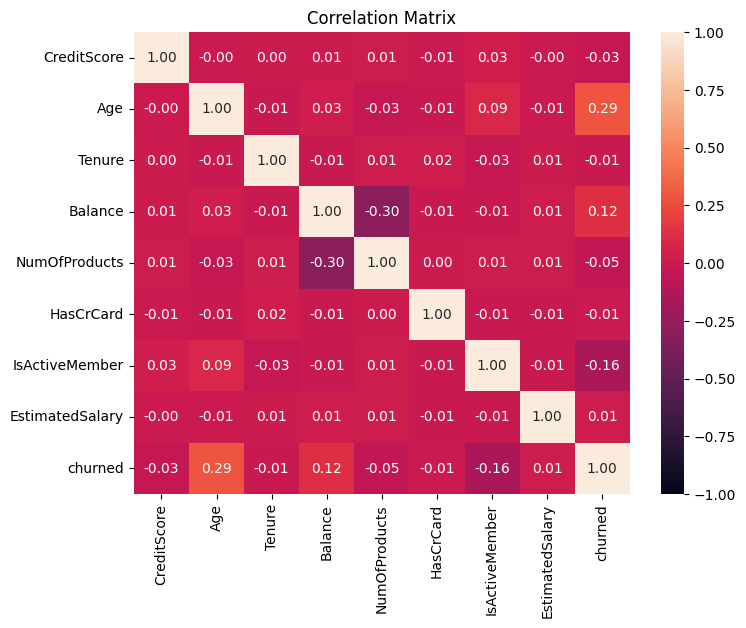

In [47]:
df_num = df.drop(columns=['Geography', 'Gender'])
corr_matrix = df_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
new_df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
label_encoder = LabelEncoder()
new_df['Gender'] = label_encoder.fit_transform(new_df['Gender'])

In [49]:
new_df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'churned',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

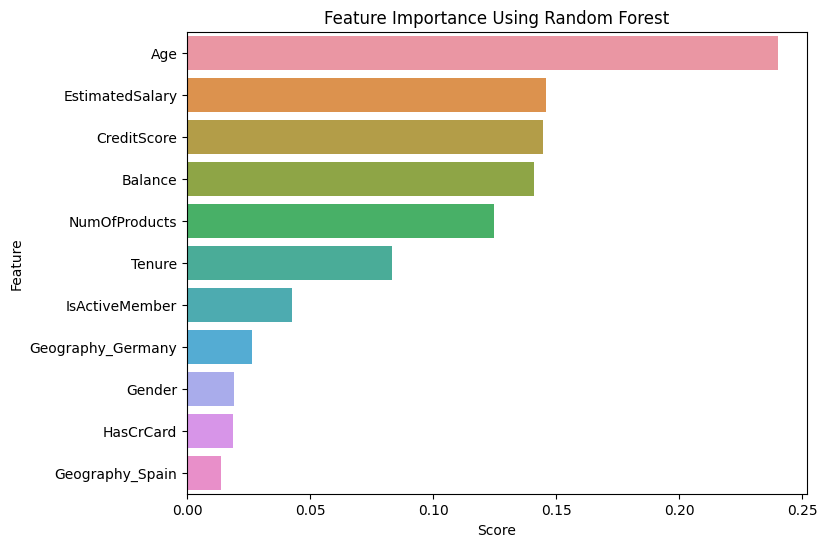

In [50]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
X = new_df.drop(columns=['churned'])
y = new_df['churned']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
RF = RandomForestClassifier(random_state=123)
RF.fit(X_train, y_train)
feature_importances = RF.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance Using Random Forest')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

In [51]:
feature_importance

,Feature,Importance
2,Age,0.240012
8,EstimatedSalary,0.145839
0,CreditScore,0.144756
4,Balance,0.140958
5,NumOfProducts,0.124772
3,Tenure,0.083436
7,IsActiveMember,0.042469
9,Geography_Germany,0.026407
1,Gender,0.018974
6,HasCrCard,0.018639


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [54]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 
    model_train_precision = precision_score(y_train, y_train_pred) 
    model_train_recall = recall_score(y_train, y_train_pred) 
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred) 
    model_test_recall = recall_score(y_test, y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) 


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7917
- F1 score: 0.7242
- Precision: 0.4085
- Recall: 0.0591
- Roc Auc Score: 0.5187
----------------------------------
Model performance for Test set
- Accuracy: 0.7830
- F1 score: 0.7106
- Precision: 0.3148
- Recall: 0.0411
- Roc Auc Score: 0.5089
Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8010
- F1 score: 0.8012
- Precision: 0.5192
- Recall: 0.5217
- Roc Auc Score: 0.6978
Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8650
- F1 score: 0.8514
- Precision: 0.7903
- Recall: 0.4734
- Roc Auc Score: 0.7203
Gradient Boost
Model performance for Training set
- Ac

Hence, best performing models are:
- Random Forest
- Gradient Boost
- Adaboost
- Xgboost

In [122]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}
gb_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8, 12, 20, 30],
    "n_estimators": [100, 200, 300],
    "subsample": [0.7, 0.8, 0.9, 1.0]
}
ada_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.1, 0.5, 1.0]
}

In [123]:
# Models list for Hyperparameter tuning
randomcv_models = [("RF", RandomForestClassifier(), rf_params), ("Gradient Boost", GradientBoostingClassifier(), gb_params),("Xgboost", XGBClassifier(), xgboost_params),("Adaboost", AdaBoostClassifier(), ada_params)]

In [126]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=10,
                                   cv=2,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 9 candidates, totalling 18 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 20, 'max_features': 5, 'max_depth': 10}
---------------- Best Params for Gradient Boost -------------------
{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 30, 'learning_rate': 0.1}
---------------- Best Params for Xgboost -------------------
{'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
---------------- Best Params for Adaboost -------------------
{'n_estimators': 200, 'learning_rate': 0.1}


In [128]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=200, min_samples_split= 20, max_features= 5, max_depth= 10),
    "Xgboost":XGBClassifier(n_estimators= 200, max_depth= 20, learning_rate= 0.01, colsample_bytree= 0.8),
    "Gradient Boost": GradientBoostingClassifier(subsample= 0.7, n_estimators= 100, max_depth= 30, learning_rate= 0.1),
    "Adaboost": AdaBoostClassifier(n_estimators= 200, learning_rate= 0.1)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.8934
- F1 score: 0.8830
- Precision: 0.8889
- Recall: 0.5422
- Roc Auc Score: 0.7625
----------------------------------
Model performance for Test set
- Accuracy: 0.8660
- F1 score: 0.8521
- Precision: 0.7992
- Recall: 0.4710
- Roc Auc Score: 0.7201


Xgboost
Model performance for Training set
- Accuracy: 0.9571
- F1 score: 0.9553
- Precision: 0.9908
- Recall: 0.7961
- Roc Auc Score: 0.8971
----------------------------------
Model performance for Test set
- Accuracy: 0.8615
- F1 score: 0.8452
- Precision: 0.8018
- Recall: 0.4396
- Roc Auc Score: 0.7056


Gradient Boost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8570
- F1 score: 0.8426
- Precision: 0.7581
- Recall: 0.4541
- Roc Auc Score: 0.7081


Adaboost
Model performance for Training set
- Accuracy: 0.85

Hence, best performing model is Random Forest.

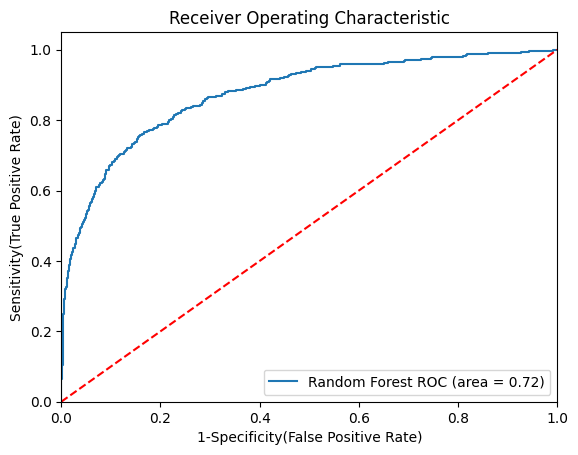

In [129]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest',
    'model':RandomForestClassifier(n_estimators=200, min_samples_split= 20, max_features= 5, max_depth= 10),
    'auc':  0.7201
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

In [55]:
def predict_churn(customer_data, model, scaler):
    """
    Predict whether a customer would churn.
    
    Parameters:
    - customer_data (dict): Dictionary containing customer data.
    - model (sklearn model): Pre-trained Random Forest model.
    - scaler (StandardScaler): Scaler fitted on the training data.
    
    Returns:
    - bool: True if the customer is predicted to churn, False otherwise.
    """
    # Convert customer data to DataFrame
    customer_df = pd.DataFrame([customer_data])
    
    # One-Hot Encoding for Geography
    customer_df = pd.get_dummies(customer_df, columns=['Geography'], drop_first=True)
    
    # Ensure all columns are present
    for col in X.columns:
        if col not in customer_df.columns:
            customer_df[col] = 0
    
    # Reorder columns to match training data
    customer_df = customer_df[X.columns]
    
    # Label Encoding for Gender
    customer_df['Gender'] = label_encoder.transform(customer_df['Gender'])
    
    # Scale the features
    customer_scaled = scaler.transform(customer_df)
    
    # Predict churn
    prediction = model.predict(customer_scaled)
    
    return bool(prediction[0])

# Sample customer data for testing
sample_customer = {
    'CreditScore': 800,
    'Geography': 'France',
    'Gender': 'Male',
    'Age': 40,
    'Tenure': 3,
    'Balance': 1000000,
    'NumOfProducts': 3,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 80000
}

# Predict churn for the sample customer
is_churning = predict_churn(sample_customer, RF, scaler)
print(f"Is the customer predicted to churn? {'Yes' if is_churning else 'No'}")


Is the customer predicted to churn? No
